# Exploratory Data Analysis (EDA)

## Daily Precipitation – Miami, FL (Open-Meteo)

---

## 1. Context and Objectives / Contexto y Objetivos

### EN

This notebook performs an exploratory data analysis (EDA) on daily meteorological data for Miami, Florida, retrieved from the Open-Meteo API. The main objective is to understand the statistical, temporal, and physical behavior of daily precipitation and to evaluate which atmospheric variables are suitable candidates for predictive modeling.

### ES

Este notebook realiza un análisis exploratorio de datos (EDA) sobre datos meteorológicos diarios de Miami, Florida, obtenidos desde la API de Open-Meteo. El objetivo principal es comprender el comportamiento estadístico, temporal y físico de la precipitación diaria y evaluar qué variables atmosféricas son candidatas adecuadas para modelos predictivos.

---

## 2. Dataset Overview / Visión general del dataset

### EN

We start by loading the dataset and performing basic sanity checks: structure, data types, missing values, and summary statistics.

### ES

Comenzamos cargando el dataset y realizando verificaciones básicas: estructura, tipos de datos, valores faltantes y estadísticas descriptivas.


In [3]:
import pandas as pd

df = pd.read_csv("../data/raw/open_meteo_miami_daily.csv")
df["date"] = pd.to_datetime(df["date"])

df.info()
df.describe()
df.isna().sum()


<class 'pandas.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       12784 non-null  str           
 1   temperature_2m_max         12784 non-null  float64       
 2   temperature_2m_min         12784 non-null  float64       
 3   temperature_2m_mean        12784 non-null  float64       
 4   precipitation_sum          12784 non-null  float64       
 5   relative_humidity_2m_mean  12784 non-null  int64         
 6   surface_pressure_mean      12784 non-null  float64       
 7   wind_speed_10m_mean        12784 non-null  float64       
 8   cloud_cover_mean           12784 non-null  int64         
 9   date                       12784 non-null  datetime64[us]
dtypes: datetime64[us](1), float64(6), int64(2), str(1)
memory usage: 998.9 KB


time                         0
temperature_2m_max           0
temperature_2m_min           0
temperature_2m_mean          0
precipitation_sum            0
relative_humidity_2m_mean    0
surface_pressure_mean        0
wind_speed_10m_mean          0
cloud_cover_mean             0
date                         0
dtype: int64

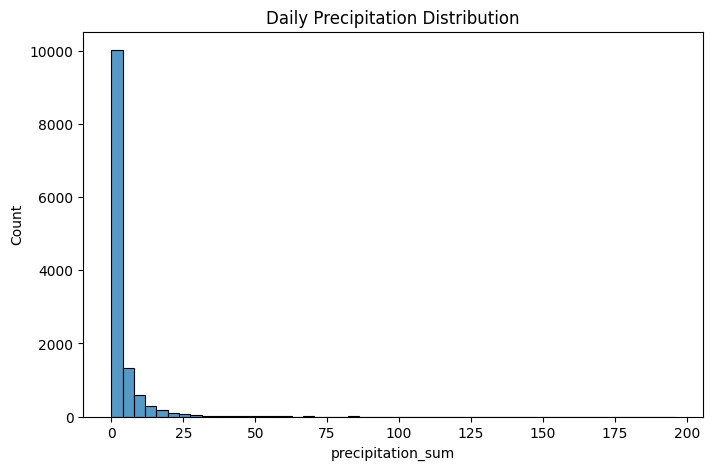

In [4]:
## 3. Target Variable Analysis: Precipitation / Variable objetivo: Precipitación

### 3.1 Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["precipitation_sum"], bins=50)
plt.title("Daily Precipitation Distribution")
plt.show()

In [5]:
### 3.2 Zero-rain days

(df["precipitation_sum"] == 0).mean()


np.float64(0.31648936170212766)

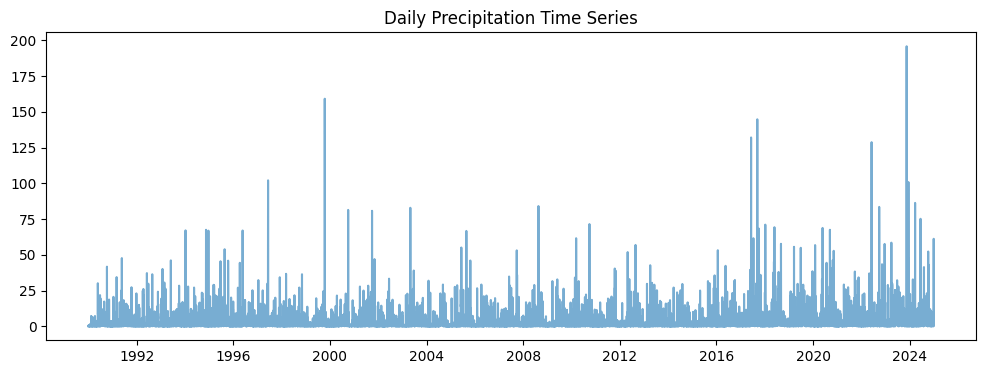

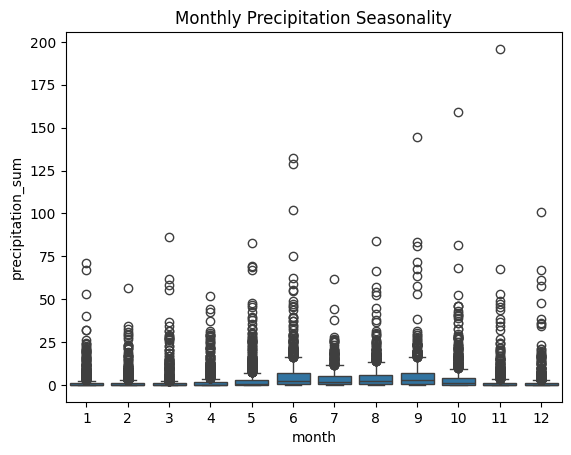

In [6]:
## 4. Temporal Analysis / Análisis temporal

### 4.1 Time series

plt.figure(figsize=(12,4))
plt.plot(df["date"], df["precipitation_sum"], alpha=0.6)
plt.title("Daily Precipitation Time Series")
plt.show()


### 4.2 Seasonality


df["month"] = df["date"].dt.month
sns.boxplot(x="month", y="precipitation_sum", data=df)
plt.title("Monthly Precipitation Seasonality")
plt.show()




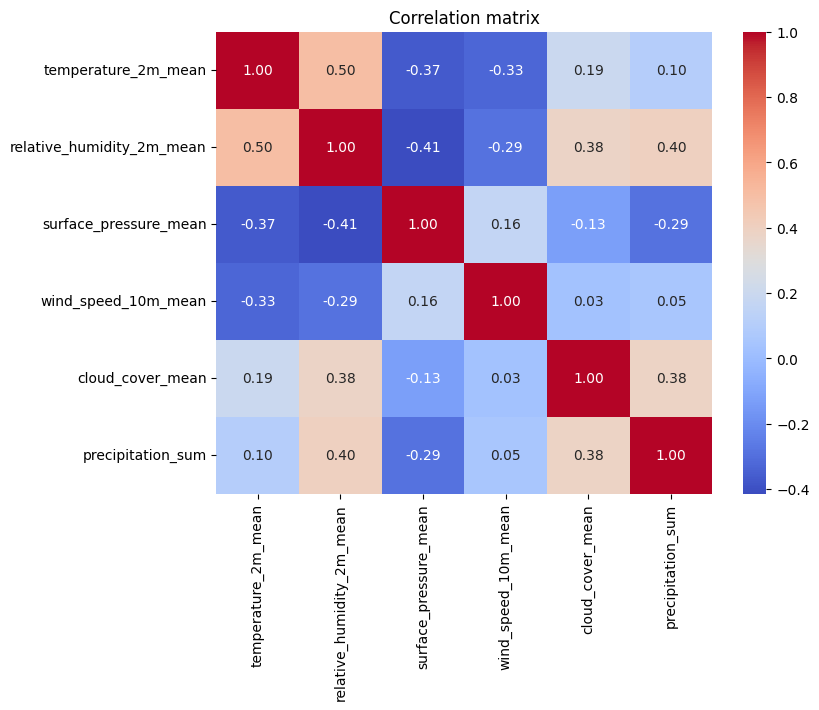

In [7]:
## 5. Physical Variables Exploration / Exploración de variables físicas

### EN - We analyze atmospheric variables that may influence precipitation based on physical reasoning.

### ES - Analizamos variables atmosféricas que pueden influir en la precipitación desde un criterio físico.

features = [
    "temperature_2m_mean",
    "relative_humidity_2m_mean",
    "surface_pressure_mean",
    "wind_speed_10m_mean",
    "cloud_cover_mean"
]

corr = df[features + ["precipitation_sum"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()



In [8]:
## 6. Extreme Events / Eventos extremos

threshold = df["precipitation_sum"].quantile(0.99)
df[df["precipitation_sum"] > threshold]



,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,relative_humidity_2m_mean,surface_pressure_mean,wind_speed_10m_mean,cloud_cover_mean,date,month
143,1990-05-24,25.7,23.7,24.6,30.1,89,1013.1,11.6,100,1990-05-24,5
281,1990-10-09,26.6,24.5,25.5,41.7,87,1007.9,31.7,98,1990-10-09,10
427,1991-03-04,22.8,19.8,21.2,34.4,76,1004.2,21.6,52,1991-03-04,3
506,1991-05-22,26.4,23.9,24.8,47.7,87,1011.7,31.7,100,1991-05-22,5
885,1992-06-04,27.2,24.1,25.3,37.2,88,1011.0,15.9,99,1992-06-04,6
...,...,...,...,...,...,...,...,...,...,...,...
12583,2024-06-14,28.1,24.1,26.4,34.4,87,1012.1,13.6,100,2024-06-14,6
12634,2024-08-04,29.3,26.0,27.4,41.4,84,1013.2,30.6,100,2024-08-04,8
12698,2024-10-07,27.9,24.7,25.5,52.3,90,1007.1,11.4,100,2024-10-07,10
12704,2024-10-13,28.0,22.9,25.3,43.1,88,1015.6,12.0,87,2024-10-13,10


## 7. EDA Conclusions / Conclusiones del EDA

### EN

* Daily precipitation is highly skewed and dominated by zero-rain days.
* Extreme rainfall events exist but are infrequent.
* Strong seasonality is observed, with higher precipitation during summer months.
* Several physical variables show moderate correlation with precipitation, supporting a regression-based approach.
* The distribution suggests potential benefits from log-transformation or hybrid modeling strategies.

### ES

* La precipitación diaria es altamente asimétrica y está dominada por días sin lluvia.
* Existen eventos de lluvia extrema, aunque poco frecuentes.
* Se observa una estacionalidad marcada, con mayores precipitaciones en los meses de verano.
* Varias variables físicas muestran correlaciones moderadas con la precipitación, lo que respalda un enfoque de regresión.
* La distribución sugiere posibles beneficios de transformaciones logarítmicas o enfoques híbridos de modelado.
